In [18]:
import sys
sys.path.append("../")

# 1. Load metadata

In [19]:
from relgen.data.metadata import Metadata

metadata = Metadata()
metadata.load_from_json("../datasets/census/metadata.json")

# 2. Load data

In [20]:
import pandas as pd

data = {
    "census": pd.read_csv("../datasets/census/census.csv")
}

# 3. Data conversion

In [21]:
from relgen.data.dataset import Dataset

dataset = Dataset(metadata)
dataset.fit(data)

# 4. Data synthesizer

In [22]:
from relgen.synthesizer.arsynthesizer import MADESynthesizer

synthesizer = MADESynthesizer(dataset)
synthesizer.fit(data)

table census start training
epoch 0: train loss 45.727, time cost 1.577s
epoch 1: train loss 41.437, time cost 1.504s
epoch 2: train loss 35.831, time cost 1.461s
epoch 3: train loss 32.320, time cost 1.542s
epoch 4: train loss 31.042, time cost 1.462s
epoch 5: train loss 30.096, time cost 1.462s
epoch 6: train loss 29.432, time cost 1.459s
epoch 7: train loss 29.188, time cost 1.457s
epoch 8: train loss 28.715, time cost 1.462s
epoch 9: train loss 28.383, time cost 1.459s
epoch 10: train loss 28.224, time cost 1.460s
epoch 11: train loss 28.216, time cost 1.458s
epoch 12: train loss 28.003, time cost 1.459s
epoch 13: train loss 27.925, time cost 1.455s
epoch 14: train loss 27.737, time cost 1.458s
epoch 15: train loss 27.346, time cost 1.458s
epoch 16: train loss 27.251, time cost 1.460s
epoch 17: train loss 27.487, time cost 1.457s
epoch 18: train loss 27.384, time cost 1.456s
epoch 19: train loss 27.147, time cost 1.461s
epoch 20: train loss 26.735, time cost 1.461s
epoch 21: train 

# 5. Generate data

In [23]:
sampled_data = synthesizer.sample()

# 6. Evaluate the generated data

In [24]:
from relgen.evaluator import Evaluator

evaluator = Evaluator(data["census"], sampled_data["census"]);

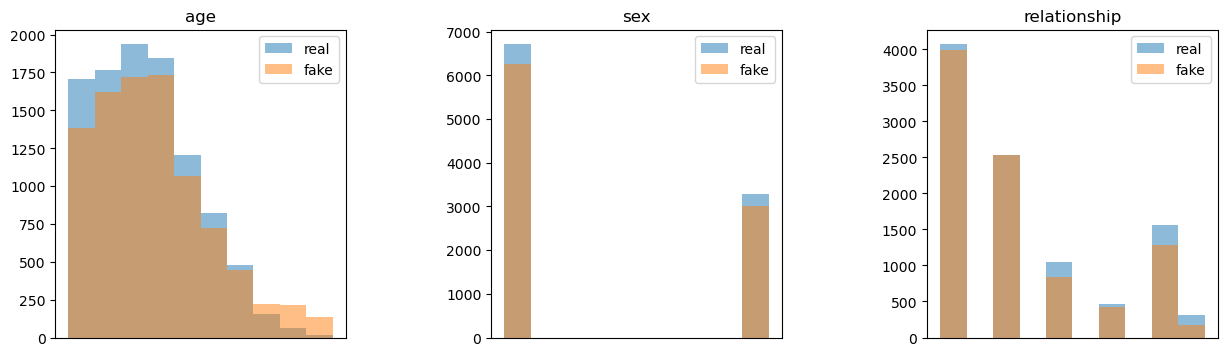

In [25]:
evaluator.eval_histogram(columns=["age", "sex", "relationship"]);

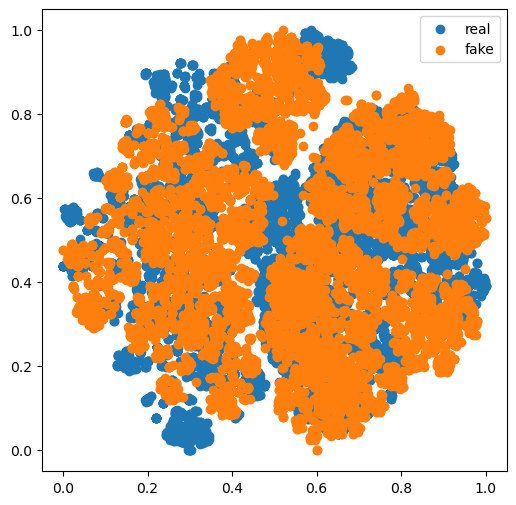

In [26]:
evaluator.eval_tsne();